<a href="https://colab.research.google.com/github/DemetrioJMartins/aulas_faculdade_data_science/blob/main/Semana_3_Exerc%C3%ADcio_de_apoio_Introdu%C3%A7%C3%A3o_a_Ciencia_de_Dados_COM350_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Disciplina - Introdução a Ciência de Dados - Univesp
##Exercícios de Apoio da Semana 3


###1 - Carregue as bibliotecas NumPy, Pandas, BeautifulSoup, MatPlotLib, Requests, JSON e Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import json

###2 – Entre no site https://db-engines.com/en/ranking, faça um scraping e gere um DataFrame com a lista de banco de dados do Ranking.

In [2]:
html = requests.get('https://db-engines.com/en/ranking').content
soup = BeautifulSoup(html,'html5lib')

In [3]:
tabela = soup.find('table',{'class':'dbi'}).find('tbody')
tabela

<tbody><tr><td colspan="99">417 systems in ranking, January 2024</td></tr><tr><td class="dbi_header" colspan="3" style="text-align:center">Rank</td><th class="dbi_header pad-l" rowspan="2" style="border-left:1px solid #aaa">DBMS</th><th class="dbi_header pad-r" rowspan="2" style="border-right:1px solid #aaa">Database Model</th><td class="dbi_header" colspan="3" style="text-align:center">Score</td></tr><tr style="line-height:100%;"><td class="dbi_header small">Jan<br/>2024</td><td class="dbi_header small">Dec<br/>2023</td><td class="dbi_header small pad-r">Jan<br/>2023</td><td class="dbi_header small pad-l">Jan<br/>2024</td><td class="dbi_header small">Dec<br/>2023</td><td class="dbi_header small">Jan<br/>2023</td></tr><tr><td>1.</td><td class="small">1.</td><td class="small pad-r">1.</td><th class="pad-l"><a href="https://db-engines.com/en/system/Oracle">Oracle <span class="info"><img alt="detailed information" height="16" src="https://db-engines.com/moreattributes.png" width="16"/><sp

In [6]:
linhas = tabela.find_all('tr')
contalinhas = 0
banco = []
pontos = []
for linha in linhas:
    contalinhas += 1
    if contalinhas > 3:
        dado = linha.find_all('td')
        dado2 = linha.find('a')
        pontos.append(float(dado[3].text))
        banco.append(dado2.contents[0])

dados = pd.DataFrame(banco, columns = ['Banco'])
dados['Pontos'] = pontos

dados

,Banco,Pontos
0,Oracle,1247.49
1,MySQL,1123.46
2,Microsoft SQL Server,876.60
3,PostgreSQL,648.96
4,MongoDB,417.48
...,...,...
412,searchxml,0.00
413,SpaceTime,0.00
414,Tkrzw,0.00
415,Transwarp Hippo,0.00


###3 – Com a Biblioteca Seaborn gere um gráfico de colunas, indicando o nome do banco e a quantidade de pontos do banco no mês atual.

<Axes: xlabel='Banco', ylabel='Pontos'>

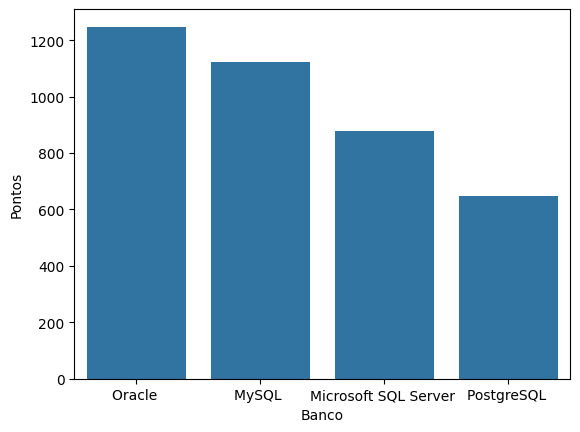

In [11]:
sns.barplot(data = dados.head(4), x ='Banco', y ='Pontos')

###4 – Gere um novo Dataframe com apenas as 10 primeiras posições da lista, crie um campo de Share (porcentagem de relevância de cada Banco de Dados em relação aos 10 listados, baseado na quantidade de pontos que eles tem). Informe qual é a porcentagem e o nome do banco que aparece em primeiro lugar.

In [12]:
dados_ex4 = dados.head(10)
total = dados_ex4['Pontos'].sum()
dados_ex4['Share'] = dados_ex4['Pontos']/total*100
dados_ex4

<ipython-input-12-e70c4a849fc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ex4['Share'] = dados_ex4['Pontos']/total*100


,Banco,Pontos,Share
0,Oracle,1247.49,25.022666
1,MySQL,1123.46,22.534821
2,Microsoft SQL Server,876.60,17.583202
3,PostgreSQL,648.96,13.017106
4,MongoDB,417.48,8.373985
5,Redis,159.38,3.196909
6,Elasticsearch,136.07,2.729348
7,IBM Db2,132.41,2.655934
8,Snowflake,125.92,2.525755
9,Microsoft Access,117.67,2.360273


###5 – Usando MatPlotLib gere um gráfico baseado no Share de cada banco em relação aos outros 9 da lista gerada no Exercício 4.

<function matplotlib.pyplot.show(close=None, block=None)>

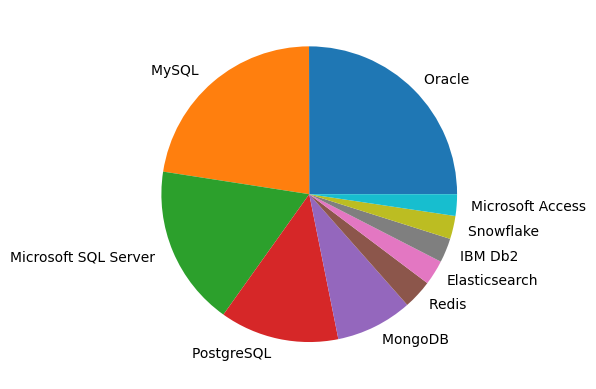

In [13]:
plt.pie(dados_ex4['Share'],labels=dados_ex4['Banco'])
plt.show

###6 – Usando o Dataframe completo, crie também uma coluna Share informado a porcentagem de relevância de cada banco em relação aos demais.

In [14]:
total = dados['Pontos'].sum()
dados['Share'] = dados['Pontos']/total*100
dados

,Banco,Pontos,Share
0,Oracle,1247.49,17.549618
1,MySQL,1123.46,15.804771
2,Microsoft SQL Server,876.60,12.331958
3,PostgreSQL,648.96,9.129532
4,MongoDB,417.48,5.873085
...,...,...,...
412,searchxml,0.00,0.000000
413,SpaceTime,0.00,0.000000
414,Tkrzw,0.00,0.000000
415,Transwarp Hippo,0.00,0.000000


###7 – Com o Dataframe gerado no Exercício 6, gere um arquivo do tipo CSV chamado “db-ranking.csv”.

In [15]:
dados.to_csv( 'db-ranking.csv')

###8 – O Banco Central dispõe de um conjunto de APIs, sendo que uma delas é o valor do Dolar. Nesse endereço tem algumas delas: https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/aplicacao#!/recursos, sendo que a primeira delas é capaz de gerar a cotação do dólar de uma determinada data.
###Utilizando Json, realize uma consulta direta a API e informe a cotação de venda do dólar do dia 16/09/2008.

In [17]:
site ="https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarDia(dataCotacao=@dataCotacao)?@dataCotacao='09-16-2008'&$top=100&$format=json&$select=cotacaoCompra,cotacaoVenda,dataHoraCotacao"
resposta = requests.get(site)
dados = json.loads(resposta.text)
dados

{'@odata.context': 'https://was-p.bcnet.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata$metadata#_CotacaoDolarDia(cotacaoCompra,cotacaoVenda,dataHoraCotacao)',
 'value': [{'cotacaoCompra': 1.8402,
   'cotacaoVenda': 1.841,
   'dataHoraCotacao': '2008-09-16 17:36:00.0'}]}

In [19]:
print(dados['value'][0]['cotacaoVenda'])

1.841
